<a href="https://colab.research.google.com/github/Diana9908/TP547/blob/main/Markov/Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# c) Dado que a mosca pousou no compartimento 1, a probabilidade dela cair em
# uma teia exatamente no terceiro minuto.

import numpy as np
import matplotlib.pyplot as plt

simulacoes = 100000  # Número de simulações de Monte Carlo
probabilidades_transicao = [[1, 0, 0, 0],      # Matriz de transição
                           [0.3, 0.4, 0.3, 0],
                           [0, 0.3, 0.4, 0.3],
                           [0, 0, 0, 1]]

instante_t3 = 3  # minuto 3
instante_t2 = 2  # minuto 2

# Vetor para armazenar o compartimento ocupado em t = 3 e t = 2 para cada
# simulação
estado_em_t3 = np.zeros(simulacoes, dtype=int)
estado_em_t2 = np.zeros(simulacoes, dtype=int)

for s in range(simulacoes):
    # Vetor para armazenar toda a trajetória da mosca
    chain = np.zeros(instante_t3 + 2, int)
    # A mosca está inicialmente no compartimento 1
    chain[0] = 1

    for i in range(instante_t3 + 1):
        # Sorteia o próximo estado
        linha_atual = probabilidades_transicao[chain[i]]
        acumulada = np.cumsum(linha_atual)
        r = np.random.uniform(0, 1)
        chain[i+1] = np.argmax(acumulada > r)

        # Se a mosca entrar nos compartimentos 0 ou 3, fica presa
        if chain[i+1] == 0:
            chain[i+1:] = 0
            break
        if chain[i+1] == 3:
            chain[i+1:] = 3
            break

    estado_em_t3[s] = chain[instante_t3]
    estado_em_t2[s] = chain[instante_t2]

# Probabilidade de estar em 0 ou 3 no minuto 3
probabilidade_abs_t3  = (np.sum(estado_em_t3 == 0) + np.sum(estado_em_t3 == 3)) / simulacoes
# Probabilidade de estar em 0 ou 3 no minuto 2
probabilidade_abs_t2  = (np.sum(estado_em_t2 == 0) + np.sum(estado_em_t2 == 3)) / simulacoes
# Probabilidade de ser absorvida exatamente no minuto 3
probabilidade_ext_t3  = probabilidade_abs_t3 - probabilidade_abs_t2

print('Probabilidade de cair em uma teia de aranha exatamente no terceiro minuto:', probabilidade_ext_t3)


Probabilidade de cair em uma teia de aranha exatamente no terceiro minuto: 0.14580000000000004


In [ ]:
# d) Número médio de passos para a absorção.
import numpy as np
import matplotlib.pyplot as plt
def num_medio_passos(estado_transitorio_inicial):
  simulacoes = 100000  # Número de simulações de Monte Carlo
  probabilidades_transicao = [[1, 0, 0, 0],      # Matriz de transição
                            [0.3, 0.4, 0.3, 0],
                            [0, 0.3, 0.4, 0.3],
                            [0, 0, 0, 1]]
  passo_sim = np.zeros(simulacoes)

  for s in range(simulacoes):
      # Inicializar o número de passos e 0
      passo = 0
      # Vetor para armazenar toda a trajetória da mosca
      chain = np.zeros(1000, dtype=int)
      # Compartimento inicial
      chain[0] = estado_transitorio_inicial
      if chain[0] == 0:
        passo_sim[s] = passo
        continue
      if chain[0] == 3:
        passo_sim[s] = passo
        continue
      else:
        for i in range(len(chain) - 1):
            # Aumentar o número de passos
            passo = passo + 1
            # Sorteia o próximo estado
            linha_atual = probabilidades_transicao[chain[i]]
            acumulada = np.cumsum(linha_atual)
            r = np.random.uniform(0, 1)
            chain[i+1] = np.argmax(acumulada > r)

            # Se a mosca entrar nos compartimentos 0 ou 3, fica presa
            if chain[i+1] == 0:
                passo_sim[s] = passo
                break
            if chain[i+1] == 3:
                passo_sim[s] = passo
                break

  # Número médio de passos para a absorção
  passo_meio  = (np.sum(passo_sim) / simulacoes)
  return passo_meio

for compartimento in range(4):
    media = num_medio_passos(compartimento)
    print(f"Média de passos saindo do compartimento {compartimento}: {media:.3f}")

Média de passos saindo do compartimento 0: 0.000
Média de passos saindo do compartimento 1: 3.328
Média de passos saindo do compartimento 2: 3.318
Média de passos saindo do compartimento 3: 0.000


In [ ]:
# e) A probabilidade  de ser absorvido associada a cada estado.
import numpy as np
import matplotlib.pyplot as plt

def probabilidade_abs(estado_inicial):
  simulacoes = 100000  # Número de simulações de Monte Carlo
  probabilidades_transicao = [[1, 0, 0, 0],      # Matriz de transição
                            [0.3, 0.4, 0.3, 0],
                            [0, 0.3, 0.4, 0.3],
                            [0, 0, 0, 1]]
  abs0 = 0
  abs3 = 0

  for s in range(simulacoes):
      # Vetor para armazenar toda a trajetória da mosca
      chain = np.zeros(100000, int)
      chain[0] = estado_inicial

      for i in range(len(chain)- 1):
          # Sorteia o próximo estado
          linha_atual = probabilidades_transicao[chain[i]]
          acumulada = np.cumsum(linha_atual)
          r = np.random.uniform(0, 1)
          chain[i+1] = np.argmax(acumulada > r)

          # Se a mosca entrar nos compartimentos 0 ou 3, fica presa
          if chain[i+1] == 0:
              abs0 = abs0 + 1
              break
          if chain[i+1] == 3:
              abs3 = abs3+ 1
              break

  # Probabilidade de ser absorvido em 0
  probabilidade_abs0  = abs0 / simulacoes
  # Probabilidade de ser absorvido em 3
  probabilidade_abs3  = abs3 / simulacoes

  return probabilidade_abs0, probabilidade_abs3

for estado_inicial in [1, 2]:
    p0, p3 = probabilidade_abs(estado_inicial)
    print(f"Estado inicial {estado_inicial}: "
          f"Probabilidade de cair na teia 0 = {p0:.3f}, "
          f"Probabilidade de cair na teia 3 = {p3:.3f}")


Estado inicial 1: Probabilidade de cair na teia 0 = 0.664, Probabilidade de cair na teia 3 = 0.336
Estado inicial 2: Probabilidade de cair na teia 0 = 0.334, Probabilidade de cair na teia 3 = 0.666


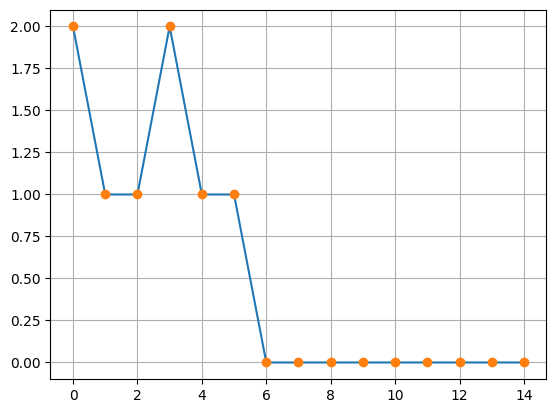

In [ ]:
# Plotar o gráfico mostrando as transições e a absorção
import numpy as np
import matplotlib.pyplot as plt
def transicoes(estado_transitorio_inicial):
  probabilidades_transicao = [[1, 0, 0, 0],      # Matriz de transição
                            [0.3, 0.4, 0.3, 0],
                            [0, 0.3, 0.4, 0.3],
                            [0, 0, 0, 1]]
  # Vetor para armazenar toda a trajetória da mosca
  chain = np.zeros(15, dtype=int)
  # Compartimento inicial
  chain[0] = estado_transitorio_inicial
  if chain[0] == 0:
    chain[0:] = 0
  elif chain[0] == 3:
    chain[0:] = 3
  else:
    for i in range(len(chain) - 1):
      # Sorteia o próximo estado
      linha_atual = probabilidades_transicao[chain[i]]
      acumulada = np.cumsum(linha_atual)
      r = np.random.uniform(0, 1)
      chain[i+1] = np.argmax(acumulada > r)

      # Se a mosca entrar nos compartimentos 0 ou 3, fica presa
      if chain[i+1] == 0:
          chain[i+1:] = 0
          break
      if chain[i+1] == 3:
          chain[i+1:] = 3
          break

  return chain

y = transicoes(2)
plt.plot(range(len(y)), y, )
plt.plot(range(len(y)), y, "o", color="tab:orange")
plt.grid()
plt.show()
